In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
individualLabels = pd.read_csv('../dataset/individual_factor_and_labels.csv', header=0)
print(individualLabels.shape)
individualLabels.head()

(310550, 27)


,summonerId,gameId,teamId,teamPosition,win,playerNumericalRank,goldEarned,playerGoldPerMin,champExperience,playerExpPerMin,...,playerVisionScorePerMin,totalMinionsKilled,playerMinionsKilledPerMin,playerTotalIndegree,playerTotalOutdegree,AcquiringFactor,NonAcquiringFactor,individual_labels,isGoodPlayer,playerClusterLabel
0,urMqoBHLvge003_UlbDVtFxRI9hc1IUgDUHJibJyX7OPQHs,EUW1_7139824479,100,TOP,0,4,10434,335.678284,15998,514.680965,...,0.965147,149,4.793566,8,15,-0.773508,-0.220719,0,False,average
1,IB17wcNnxvRxXv3ATJwo0BFBKl6funU0RU9f5Chg8wkm3sRu,EUW1_7139824479,100,JUNGLE,0,4,11754,378.144772,12801,411.828418,...,0.804290,21,0.675603,14,18,-0.264876,-0.238105,0,False,average
2,6OSj8EMpeN-25RAzOVlkLoMss0qbRSDWt_DSV-EK9TbgAUFA,EUW1_7139824479,100,MIDDLE,0,3,14008,450.659517,16812,540.868633,...,0.868633,224,7.206434,17,13,0.680857,0.011135,2,True,good
3,WL5b92v_8-lP1RvTKado4XL7ZnGnozfSHkOJyz6ruPhbaYIL,EUW1_7139824479,100,BOTTOM,0,5,13199,424.632708,13664,439.592493,...,0.160858,162,5.211796,26,7,0.128600,-1.045854,0,False,average
4,7ik42UGLweXMslY7AHf4oJl2yIY7tJOHWfrQztibBg6D6aeq,EUW1_7139824479,100,UTILITY,0,4,7658,246.369973,9087,292.343164,...,1.833780,25,0.804290,3,15,-1.656852,0.776635,1,False,bad


### Distribution of good and bad individual players

In [3]:
individualLabels['playerClusterLabel'].value_counts()

playerClusterLabel
average    144275
good       112862
bad         53413
Name: count, dtype: int64

### How often do good players win or lose the game

In [4]:
individualLabels[individualLabels['playerClusterLabel'] == 'good']['win'].value_counts()

win
1    81672
0    31190
Name: count, dtype: int64

### How often do bad players win or lose the game

In [5]:
individualLabels[individualLabels['playerClusterLabel'] == 'bad']['win'].value_counts()

win
1    28077
0    25336
Name: count, dtype: int64

### Howe often do average players win or lose the game

In [6]:
individualLabels[individualLabels['playerClusterLabel'] == 'average']['win'].value_counts()

win
0    98749
1    45526
Name: count, dtype: int64

In [7]:
teamLabels = pd.read_csv('../dataset/team_factor_and_labels.csv', header=0)
print(teamLabels.shape)
teamLabels.head()

(62110, 14)


,gameId,teamId,win,averageTeamGoldPerMin,averageTeamExpPerMin,averageTeamVPM,teamIndegreeCentrality,teamOutdegreeCentrality,resistance,NonCooperativeFactor,CooperativeFactor,team_labels,isGoodTeam,teamClusterLabel
0,EUW1_7139824479,100,0,367.2,439.862735,0.926542,0.227941,0.080882,0.6500,0.731456,-0.738828,0,False,bad
1,EUW1_7139824479,200,1,387.8,451.058445,0.701340,0.204545,0.172078,0.5907,0.201695,-0.065562,0,False,bad
2,EUW1_7140549083,100,0,380.4,416.710163,0.971142,0.240196,0.142157,1.0599,0.419814,0.016391,0,False,bad
3,EUW1_7140549083,200,1,500.6,544.592221,1.069009,0.174757,0.065534,0.4496,-2.502744,-0.102221,1,True,good
4,EUW1_7139855952,100,1,423.4,497.323814,1.199388,0.173729,0.067797,1.0129,-0.656660,-0.414528,1,True,good


### Distribution of good and bad team

In [8]:
teamLabels['teamClusterLabel'].value_counts()

teamClusterLabel
good       28517
bad        26498
average     7095
Name: count, dtype: int64

### How often do good teams win or lose

In [9]:
teamLabels[teamLabels['teamClusterLabel'] == 'good']['win'].value_counts()

win
1    25535
0     2982
Name: count, dtype: int64

### How often do bad teams win or lose

In [10]:
teamLabels[teamLabels['teamClusterLabel'] == 'bad']['win'].value_counts()

win
0    21150
1     5348
Name: count, dtype: int64

### How often do average teams wins or lose

In [11]:
teamLabels[teamLabels['teamClusterLabel'] == 'average']['win'].value_counts()

win
0    6923
1     172
Name: count, dtype: int64

In [12]:
# selective features for individual and team data
individualData = individualLabels[['summonerId', 'gameId', 'teamId', 'teamPosition', 'win', 'playerNumericalRank', 'AcquiringFactor', 'NonAcquiringFactor', 'playerClusterLabel']]
teamData = teamLabels[['gameId', 'teamId', 'win', 'teamIndegreeCentrality', 'teamOutdegreeCentrality', 'resistance', 'CooperativeFactor', 'NonCooperativeFactor', 'teamClusterLabel']]

individualInTeamLabels = individualData.merge(teamData, on=['gameId', 'teamId', 'win'], how='inner')
print(individualInTeamLabels.shape)

individualInTeamLabels.head()


(310550, 15)


,summonerId,gameId,teamId,teamPosition,win,playerNumericalRank,AcquiringFactor,NonAcquiringFactor,playerClusterLabel,teamIndegreeCentrality,teamOutdegreeCentrality,resistance,CooperativeFactor,NonCooperativeFactor,teamClusterLabel
0,urMqoBHLvge003_UlbDVtFxRI9hc1IUgDUHJibJyX7OPQHs,EUW1_7139824479,100,TOP,0,4,-0.773508,-0.220719,average,0.227941,0.080882,0.65,-0.738828,0.731456,bad
1,IB17wcNnxvRxXv3ATJwo0BFBKl6funU0RU9f5Chg8wkm3sRu,EUW1_7139824479,100,JUNGLE,0,4,-0.264876,-0.238105,average,0.227941,0.080882,0.65,-0.738828,0.731456,bad
2,6OSj8EMpeN-25RAzOVlkLoMss0qbRSDWt_DSV-EK9TbgAUFA,EUW1_7139824479,100,MIDDLE,0,3,0.680857,0.011135,good,0.227941,0.080882,0.65,-0.738828,0.731456,bad
3,WL5b92v_8-lP1RvTKado4XL7ZnGnozfSHkOJyz6ruPhbaYIL,EUW1_7139824479,100,BOTTOM,0,5,0.128600,-1.045854,average,0.227941,0.080882,0.65,-0.738828,0.731456,bad
4,7ik42UGLweXMslY7AHf4oJl2yIY7tJOHWfrQztibBg6D6aeq,EUW1_7139824479,100,UTILITY,0,4,-1.656852,0.776635,bad,0.227941,0.080882,0.65,-0.738828,0.731456,bad


In [13]:
individualInTeamLabels['isGoodPlayer'] = np.where(individualInTeamLabels['playerClusterLabel'] == 'good', 1, 0)
individualInTeamLabels['isBadPlayer'] = np.where(individualInTeamLabels['playerClusterLabel'] == 'bad', 1, 0)
individualInTeamLabels['isAveragePlayer'] = np.where(individualInTeamLabels['playerClusterLabel'] == 'average', 1, 0)

individualInTeamLabels['isGoodTeam'] = np.where(individualInTeamLabels['teamClusterLabel'] == 'good', 1, 0)
individualInTeamLabels['isBadTeam'] = np.where(individualInTeamLabels['teamClusterLabel'] == 'bad', 1, 0)
individualInTeamLabels['isAverageTeam'] = np.where(individualInTeamLabels['teamClusterLabel'] == 'average', 1, 0)

individualInTeamLabels

,summonerId,gameId,teamId,teamPosition,win,playerNumericalRank,AcquiringFactor,NonAcquiringFactor,playerClusterLabel,teamIndegreeCentrality,...,resistance,CooperativeFactor,NonCooperativeFactor,teamClusterLabel,isGoodPlayer,isBadPlayer,isAveragePlayer,isGoodTeam,isBadTeam,isAverageTeam
0,urMqoBHLvge003_UlbDVtFxRI9hc1IUgDUHJibJyX7OPQHs,EUW1_7139824479,100,TOP,0,4,-0.773508,-0.220719,average,0.227941,...,0.6500,-0.738828,0.731456,bad,0,0,1,0,1,0
1,IB17wcNnxvRxXv3ATJwo0BFBKl6funU0RU9f5Chg8wkm3sRu,EUW1_7139824479,100,JUNGLE,0,4,-0.264876,-0.238105,average,0.227941,...,0.6500,-0.738828,0.731456,bad,0,0,1,0,1,0
2,6OSj8EMpeN-25RAzOVlkLoMss0qbRSDWt_DSV-EK9TbgAUFA,EUW1_7139824479,100,MIDDLE,0,3,0.680857,0.011135,good,0.227941,...,0.6500,-0.738828,0.731456,bad,1,0,0,0,1,0
3,WL5b92v_8-lP1RvTKado4XL7ZnGnozfSHkOJyz6ruPhbaYIL,EUW1_7139824479,100,BOTTOM,0,5,0.128600,-1.045854,average,0.227941,...,0.6500,-0.738828,0.731456,bad,0,0,1,0,1,0
4,7ik42UGLweXMslY7AHf4oJl2yIY7tJOHWfrQztibBg6D6aeq,EUW1_7139824479,100,UTILITY,0,4,-1.656852,0.776635,bad,0.227941,...,0.6500,-0.738828,0.731456,bad,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310545,q5_UPBn080NYn7ZSfiTK2_h9LS2Te-wdTYM1cWDSH5y6DG...,EUW1_7139963823,200,TOP,1,30,1.836734,-0.323978,good,0.290541,...,0.5978,-0.198584,-0.631088,good,1,0,0,1,0,0
310546,If-qENegzmDli7cccZx9oEwQ_QaJb8TkVSg7srpkhh-fpUw,EUW1_7139963823,200,JUNGLE,1,30,0.209871,-0.502533,average,0.290541,...,0.5978,-0.198584,-0.631088,good,0,0,1,1,0,0
310547,xOWK8rx58hgBl3zHaoerIsJOXvvIetUOLdBdYN0SlYd1CXqX,EUW1_7139963823,200,MIDDLE,1,29,0.230619,-0.044144,good,0.290541,...,0.5978,-0.198584,-0.631088,good,1,0,0,1,0,0
310548,W07HWvdC3QYFl-L4p0hq9f9g3hxmdZwvuqi4ToIkvDBQBssm,EUW1_7139963823,200,BOTTOM,1,31,0.467504,0.055701,good,0.290541,...,0.5978,-0.198584,-0.631088,good,1,0,0,1,0,0


## Cross-Analysis for Good Teams

In [14]:
# good, bad and average players count within good teams
goodPlayerCountInGoodTeam = individualInTeamLabels[individualInTeamLabels['isGoodTeam'] == True].groupby(['gameId', 'teamId'])['isGoodPlayer'].sum().reset_index(name='goodPlayersCountInTeam')
goodPlayerCountInGoodTeam['majorityGoodPlayers'] = goodPlayerCountInGoodTeam['goodPlayersCountInTeam'] > 2

badPlayerCountInGoodTeam = individualInTeamLabels[individualInTeamLabels['isGoodTeam'] == True].groupby(['gameId', 'teamId'])['isBadPlayer'].sum().reset_index(name='badPlayersCountInTeam')
badPlayerCountInGoodTeam['majorityBadPlayers'] = badPlayerCountInGoodTeam['badPlayersCountInTeam'] > 2

avgPlayerCountInGoodTeam = individualInTeamLabels[individualInTeamLabels['isGoodTeam'] == True].groupby(['gameId', 'teamId'])['isAveragePlayer'].sum().reset_index(name='avgPlayersCountInTeam')
avgPlayerCountInGoodTeam['majorityAvgPlayers'] = avgPlayerCountInGoodTeam['avgPlayersCountInTeam'] > 2


In [15]:
goodPlayerCountInGoodTeam['majorityGoodPlayers'].value_counts()

majorityGoodPlayers
True     18079
False    10438
Name: count, dtype: int64

In [16]:
badPlayerCountInGoodTeam['majorityBadPlayers'].value_counts()

majorityBadPlayers
False    28517
Name: count, dtype: int64

In [17]:
avgPlayerCountInGoodTeam['majorityAvgPlayers'].value_counts()

majorityAvgPlayers
False    26141
True      2376
Name: count, dtype: int64

In [18]:
goodPlayerCountInGoodTeam = goodPlayerCountInGoodTeam.merge(teamLabels[['gameId', 'teamId', 'win']], on=['gameId', 'teamId'], how='inner')
print(goodPlayerCountInGoodTeam.shape)

badPlayerCountInGoodTeam = badPlayerCountInGoodTeam.merge(teamLabels[['gameId', 'teamId', 'win']], on=['gameId', 'teamId'], how='inner')
print(badPlayerCountInGoodTeam.shape)

avgPlayerCountInGoodTeam = avgPlayerCountInGoodTeam.merge(teamLabels[['gameId', 'teamId', 'win']], on=['gameId', 'teamId'], how='inner')
print(avgPlayerCountInGoodTeam.shape)

(28517, 5)
(28517, 5)
(28517, 5)


### How often do good teams with majority of good, bad or average players win the game

In [19]:
goodPlayerCountInGoodTeam[goodPlayerCountInGoodTeam['majorityGoodPlayers'] == True]['win'].value_counts()

win
1    17032
0     1047
Name: count, dtype: int64

In [20]:
badPlayerCountInGoodTeam[badPlayerCountInGoodTeam['majorityBadPlayers'] == True]['win'].value_counts()

Series([], Name: count, dtype: int64)

In [21]:
avgPlayerCountInGoodTeam[avgPlayerCountInGoodTeam['majorityAvgPlayers'] == True]['win'].value_counts()

win
1    1831
0     545
Name: count, dtype: int64

## Cross-Analysis for Bad Teams

In [22]:
# good, bad and average player count within bad team matches
goodPlayerCountInBadTeam = individualInTeamLabels[individualInTeamLabels['isBadTeam'] == True].groupby(['gameId', 'teamId'])['isGoodPlayer'].sum().reset_index(name='goodPlayersCountInTeam') 
goodPlayerCountInBadTeam['majorityGoodPlayers'] = goodPlayerCountInBadTeam['goodPlayersCountInTeam'] > 2

badPlayerCountInBadTeam = individualInTeamLabels[individualInTeamLabels['isBadTeam'] == True].groupby(['gameId', 'teamId'])['isBadPlayer'].sum().reset_index(name='badPlayersCountInTeam') 
badPlayerCountInBadTeam['majorityBadPlayers'] = badPlayerCountInBadTeam['badPlayersCountInTeam'] > 2

avgPlayerCountInBadTeam = individualInTeamLabels[individualInTeamLabels['isBadTeam'] == True].groupby(['gameId', 'teamId'])['isAveragePlayer'].sum().reset_index(name='avgPlayersCountInTeam') 
avgPlayerCountInBadTeam['majorityAvgPlayers'] = avgPlayerCountInBadTeam['avgPlayersCountInTeam'] > 2

In [23]:
goodPlayerCountInBadTeam = goodPlayerCountInBadTeam.merge(teamLabels[['gameId', 'teamId', 'win']], on=['gameId', 'teamId'], how='inner')
print(goodPlayerCountInBadTeam.shape)

badPlayerCountInBadTeam = badPlayerCountInBadTeam.merge(teamLabels[['gameId', 'teamId', 'win']], on=['gameId', 'teamId'], how='inner')
print(badPlayerCountInBadTeam.shape)

avgPlayerCountInBadTeam = avgPlayerCountInBadTeam.merge(teamLabels[['gameId', 'teamId', 'win']], on=['gameId', 'teamId'], how='inner')
print(avgPlayerCountInBadTeam.shape)

(26498, 5)
(26498, 5)
(26498, 5)


In [24]:
goodPlayerCountInBadTeam['majorityGoodPlayers'].value_counts()

majorityGoodPlayers
False    25132
True      1366
Name: count, dtype: int64

In [25]:
badPlayerCountInBadTeam['majorityBadPlayers'].value_counts()

majorityBadPlayers
False    26496
True         2
Name: count, dtype: int64

In [26]:
avgPlayerCountInBadTeam['majorityAvgPlayers'].value_counts()

majorityAvgPlayers
True     18950
False     7548
Name: count, dtype: int64

### How often do bad teams with a majority of good, bad or average players win the game

In [27]:
goodPlayerCountInBadTeam[goodPlayerCountInBadTeam['majorityGoodPlayers'] == True]['win'].value_counts()

win
1    747
0    619
Name: count, dtype: int64

In [28]:
badPlayerCountInBadTeam[badPlayerCountInBadTeam['majorityBadPlayers'] == True]['win'].value_counts()

win
0    1
1    1
Name: count, dtype: int64

In [29]:
avgPlayerCountInBadTeam[avgPlayerCountInBadTeam['majorityAvgPlayers'] == True]['win'].value_counts()

win
0    16451
1     2499
Name: count, dtype: int64

## Cross-Analysis for Average teams

In [30]:
# good, bad and average player count within average teams
goodPlayerCountInAverageTeam = individualInTeamLabels[individualInTeamLabels['isAverageTeam'] == True].groupby(['gameId', 'teamId'])['isGoodPlayer'].sum().reset_index(name='goodPlayersCountInTeam') 
goodPlayerCountInAverageTeam['majorityGoodPlayers'] = goodPlayerCountInAverageTeam['goodPlayersCountInTeam'] > 2

badPlayerCountInAverageTeam = individualInTeamLabels[individualInTeamLabels['isAverageTeam'] == True].groupby(['gameId', 'teamId'])['isBadPlayer'].sum().reset_index(name='badPlayersCountInTeam') 
badPlayerCountInAverageTeam['majorityBadPlayers'] = badPlayerCountInBadTeam['badPlayersCountInTeam'] > 2

avgPlayerCountInAverageTeam = individualInTeamLabels[individualInTeamLabels['isAverageTeam'] == True].groupby(['gameId', 'teamId'])['isAveragePlayer'].sum().reset_index(name='avgPlayersCountInTeam') 
avgPlayerCountInAverageTeam['majorityAvgPlayers'] = avgPlayerCountInBadTeam['avgPlayersCountInTeam'] > 2

In [31]:
goodPlayerCountInAverageTeam = goodPlayerCountInAverageTeam.merge(teamLabels[['gameId', 'teamId', 'win']], on=['gameId', 'teamId'], how='inner')
print(goodPlayerCountInAverageTeam.shape)

badPlayerCountInAverageTeam = badPlayerCountInAverageTeam.merge(teamLabels[['gameId', 'teamId', 'win']], on=['gameId', 'teamId'], how='inner')
print(badPlayerCountInAverageTeam.shape)

avgPlayerCountInAverageTeam = avgPlayerCountInAverageTeam.merge(teamLabels[['gameId', 'teamId', 'win']], on=['gameId', 'teamId'], how='inner')
print(avgPlayerCountInAverageTeam.shape)

(7095, 5)
(7095, 5)
(7095, 5)


In [32]:
goodPlayerCountInAverageTeam['majorityGoodPlayers'].value_counts()

majorityGoodPlayers
False    7047
True       48
Name: count, dtype: int64

In [33]:
badPlayerCountInAverageTeam['majorityBadPlayers'].value_counts()

majorityBadPlayers
False    7095
Name: count, dtype: int64

In [34]:
avgPlayerCountInAverageTeam['majorityAvgPlayers'].value_counts()

majorityAvgPlayers
True     5131
False    1964
Name: count, dtype: int64

### How often do average teams with a majority of good, bad or average players win the game

In [35]:
goodPlayerCountInAverageTeam[goodPlayerCountInAverageTeam['majorityGoodPlayers'] == True]['win'].value_counts()

win
0    30
1    18
Name: count, dtype: int64

In [36]:
badPlayerCountInAverageTeam[badPlayerCountInAverageTeam['majorityBadPlayers'] == True]['win'].value_counts()

Series([], Name: count, dtype: int64)

In [37]:
avgPlayerCountInAverageTeam[avgPlayerCountInAverageTeam['majorityAvgPlayers'] == True]['win'].value_counts()

win
0    5000
1     131
Name: count, dtype: int64

In [38]:
# good players count in good team
goodPlayerCountInGoodTeam

,gameId,teamId,goodPlayersCountInTeam,majorityGoodPlayers,win
0,EUN1_3674082346,100,3,True,1
1,EUN1_3674432138,200,2,False,1
2,EUN1_3674441883,100,1,False,1
3,EUN1_3674480330,100,2,False,1
4,EUN1_3674818975,200,4,True,1
...,...,...,...,...,...
28512,TR1_1556136687,200,3,True,1
28513,TR1_1557321820,100,2,False,1
28514,TR1_1557328989,200,2,False,1
28515,TR1_1557947149,200,3,True,1


## Out-performance analysis

One way to check outperformance is by checking for team-level data such that a good team although with majority of individually bad or average players win the game more often than a bad team with a majority of individually average or good players

In [39]:
# using the second approach
goodPlayerCount = individualInTeamLabels[individualInTeamLabels['isGoodPlayer'] == True].groupby(['gameId', 'teamId'])['summonerId'].count().reset_index(name='teamGoodPlayerCount')
individualInTeamLabels = individualInTeamLabels.merge(goodPlayerCount, on=['gameId', 'teamId'], how='left')
individualInTeamLabels['teamGoodPlayerCount'].fillna(0, inplace=True)

averagePlayerCount = individualInTeamLabels[individualInTeamLabels['isAveragePlayer'] == True].groupby(['gameId', 'teamId'])['summonerId'].count().reset_index(name='teamAveragePlayerCount')
individualInTeamLabels = individualInTeamLabels.merge(averagePlayerCount, on=['gameId', 'teamId'], how='left')
individualInTeamLabels['teamAveragePlayerCount'].fillna(0, inplace=True)

badPlayerCount = individualInTeamLabels[individualInTeamLabels['isBadPlayer'] == True].groupby(['gameId', 'teamId'])['summonerId'].count().reset_index(name='teamBadPlayerCount')
individualInTeamLabels = individualInTeamLabels.merge(badPlayerCount, on=['gameId', 'teamId'], how='left')
individualInTeamLabels['teamBadPlayerCount'].fillna(0, inplace=True)

individualInTeamLabels

/tmp/ipykernel_11523/1336041978.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  individualInTeamLabels['teamGoodPlayerCount'].fillna(0, inplace=True)
/tmp/ipykernel_11523/1336041978.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

,summonerId,gameId,teamId,teamPosition,win,playerNumericalRank,AcquiringFactor,NonAcquiringFactor,playerClusterLabel,teamIndegreeCentrality,...,teamClusterLabel,isGoodPlayer,isBadPlayer,isAveragePlayer,isGoodTeam,isBadTeam,isAverageTeam,teamGoodPlayerCount,teamAveragePlayerCount,teamBadPlayerCount
0,urMqoBHLvge003_UlbDVtFxRI9hc1IUgDUHJibJyX7OPQHs,EUW1_7139824479,100,TOP,0,4,-0.773508,-0.220719,average,0.227941,...,bad,0,0,1,0,1,0,1.0,3.0,1.0
1,IB17wcNnxvRxXv3ATJwo0BFBKl6funU0RU9f5Chg8wkm3sRu,EUW1_7139824479,100,JUNGLE,0,4,-0.264876,-0.238105,average,0.227941,...,bad,0,0,1,0,1,0,1.0,3.0,1.0
2,6OSj8EMpeN-25RAzOVlkLoMss0qbRSDWt_DSV-EK9TbgAUFA,EUW1_7139824479,100,MIDDLE,0,3,0.680857,0.011135,good,0.227941,...,bad,1,0,0,0,1,0,1.0,3.0,1.0
3,WL5b92v_8-lP1RvTKado4XL7ZnGnozfSHkOJyz6ruPhbaYIL,EUW1_7139824479,100,BOTTOM,0,5,0.128600,-1.045854,average,0.227941,...,bad,0,0,1,0,1,0,1.0,3.0,1.0
4,7ik42UGLweXMslY7AHf4oJl2yIY7tJOHWfrQztibBg6D6aeq,EUW1_7139824479,100,UTILITY,0,4,-1.656852,0.776635,bad,0.227941,...,bad,0,1,0,0,1,0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310545,q5_UPBn080NYn7ZSfiTK2_h9LS2Te-wdTYM1cWDSH5y6DG...,EUW1_7139963823,200,TOP,1,30,1.836734,-0.323978,good,0.290541,...,good,1,0,0,1,0,0,3.0,1.0,1.0
310546,If-qENegzmDli7cccZx9oEwQ_QaJb8TkVSg7srpkhh-fpUw,EUW1_7139963823,200,JUNGLE,1,30,0.209871,-0.502533,average,0.290541,...,good,0,0,1,1,0,0,3.0,1.0,1.0
310547,xOWK8rx58hgBl3zHaoerIsJOXvvIetUOLdBdYN0SlYd1CXqX,EUW1_7139963823,200,MIDDLE,1,29,0.230619,-0.044144,good,0.290541,...,good,1,0,0,1,0,0,3.0,1.0,1.0
310548,W07HWvdC3QYFl-L4p0hq9f9g3hxmdZwvuqi4ToIkvDBQBssm,EUW1_7139963823,200,BOTTOM,1,31,0.467504,0.055701,good,0.290541,...,good,1,0,0,1,0,0,3.0,1.0,1.0


In [40]:
# some sanity-check
individualInTeamLabels['playersCountCheck'] = np.where((individualInTeamLabels['teamBadPlayerCount'] + individualInTeamLabels['teamAveragePlayerCount'] + individualInTeamLabels['teamGoodPlayerCount'] == 5), True, False)
individualInTeamLabels['playersCountCheck'].value_counts()

playersCountCheck
True    310550
Name: count, dtype: int64

In [41]:
individualInTeamLabels['majorityBadOrAveragePlayers'] = np.where(individualInTeamLabels['teamGoodPlayerCount'] <= 2, True, False)
individualInTeamLabels['majorityGoodOrAveragePlayers'] = np.where(individualInTeamLabels['teamBadPlayerCount'] <= 2, True, False)
individualInTeamLabels['majorityGoodPlayers'] = np.where(individualInTeamLabels['teamGoodPlayerCount'] >= 3, True, False)
individualInTeamLabels['majorityBadPlayers'] = np.where(individualInTeamLabels['teamBadPlayerCount'] >= 3, True, False)
individualInTeamLabels

,summonerId,gameId,teamId,teamPosition,win,playerNumericalRank,AcquiringFactor,NonAcquiringFactor,playerClusterLabel,teamIndegreeCentrality,...,isBadTeam,isAverageTeam,teamGoodPlayerCount,teamAveragePlayerCount,teamBadPlayerCount,playersCountCheck,majorityBadOrAveragePlayers,majorityGoodOrAveragePlayers,majorityGoodPlayers,majorityBadPlayers
0,urMqoBHLvge003_UlbDVtFxRI9hc1IUgDUHJibJyX7OPQHs,EUW1_7139824479,100,TOP,0,4,-0.773508,-0.220719,average,0.227941,...,1,0,1.0,3.0,1.0,True,True,True,False,False
1,IB17wcNnxvRxXv3ATJwo0BFBKl6funU0RU9f5Chg8wkm3sRu,EUW1_7139824479,100,JUNGLE,0,4,-0.264876,-0.238105,average,0.227941,...,1,0,1.0,3.0,1.0,True,True,True,False,False
2,6OSj8EMpeN-25RAzOVlkLoMss0qbRSDWt_DSV-EK9TbgAUFA,EUW1_7139824479,100,MIDDLE,0,3,0.680857,0.011135,good,0.227941,...,1,0,1.0,3.0,1.0,True,True,True,False,False
3,WL5b92v_8-lP1RvTKado4XL7ZnGnozfSHkOJyz6ruPhbaYIL,EUW1_7139824479,100,BOTTOM,0,5,0.128600,-1.045854,average,0.227941,...,1,0,1.0,3.0,1.0,True,True,True,False,False
4,7ik42UGLweXMslY7AHf4oJl2yIY7tJOHWfrQztibBg6D6aeq,EUW1_7139824479,100,UTILITY,0,4,-1.656852,0.776635,bad,0.227941,...,1,0,1.0,3.0,1.0,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310545,q5_UPBn080NYn7ZSfiTK2_h9LS2Te-wdTYM1cWDSH5y6DG...,EUW1_7139963823,200,TOP,1,30,1.836734,-0.323978,good,0.290541,...,0,0,3.0,1.0,1.0,True,False,True,True,False
310546,If-qENegzmDli7cccZx9oEwQ_QaJb8TkVSg7srpkhh-fpUw,EUW1_7139963823,200,JUNGLE,1,30,0.209871,-0.502533,average,0.290541,...,0,0,3.0,1.0,1.0,True,False,True,True,False
310547,xOWK8rx58hgBl3zHaoerIsJOXvvIetUOLdBdYN0SlYd1CXqX,EUW1_7139963823,200,MIDDLE,1,29,0.230619,-0.044144,good,0.290541,...,0,0,3.0,1.0,1.0,True,False,True,True,False
310548,W07HWvdC3QYFl-L4p0hq9f9g3hxmdZwvuqi4ToIkvDBQBssm,EUW1_7139963823,200,BOTTOM,1,31,0.467504,0.055701,good,0.290541,...,0,0,3.0,1.0,1.0,True,False,True,True,False


In [42]:
filtered_df = individualInTeamLabels[['gameId', 'teamId', 'win', 'isGoodTeam', 'isBadTeam', 'isAverageTeam', 'teamGoodPlayerCount', 'teamBadPlayerCount', 'teamAveragePlayerCount', 'majorityBadOrAveragePlayers', 'majorityGoodOrAveragePlayers', 'majorityGoodPlayers', 'majorityBadPlayers']]
print(filtered_df.shape)
filtered_df.drop_duplicates(inplace=True)
print(filtered_df.shape)

filtered_df

(310550, 13)
(62110, 13)


/tmp/ipykernel_11523/1361226457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop_duplicates(inplace=True)


,gameId,teamId,win,isGoodTeam,isBadTeam,isAverageTeam,teamGoodPlayerCount,teamBadPlayerCount,teamAveragePlayerCount,majorityBadOrAveragePlayers,majorityGoodOrAveragePlayers,majorityGoodPlayers,majorityBadPlayers
0,EUW1_7139824479,100,0,0,1,0,1.0,1.0,3.0,True,True,False,False
5,EUW1_7139824479,200,1,0,1,0,2.0,0.0,3.0,True,True,False,False
10,EUW1_7140549083,100,0,0,1,0,1.0,1.0,3.0,True,True,False,False
15,EUW1_7140549083,200,1,1,0,0,4.0,1.0,0.0,False,True,True,False
20,EUW1_7139855952,100,1,1,0,0,3.0,1.0,1.0,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
310525,EUW1_7139969225,200,0,0,0,1,0.0,1.0,4.0,True,True,False,False
310530,EUW1_7142645284,100,1,1,0,0,2.0,1.0,2.0,True,True,False,False
310535,EUW1_7142645284,200,0,0,0,1,0.0,1.0,4.0,True,True,False,False
310540,EUW1_7139963823,100,0,0,1,0,2.0,1.0,2.0,True,True,False,False


In [43]:
# matches with good teams
matches_with_good_teams = filtered_df[filtered_df['isGoodTeam'] == True].shape[0]
print(f"Number of matches with good team: {matches_with_good_teams}")

matches_with_good_teams_win = filtered_df[(filtered_df['isGoodTeam'] == True) & (filtered_df['win'] == True)].shape[0]
print(f"Corresponding wins: {matches_with_good_teams_win}")

Number of matches with good team: 28517
Corresponding wins: 25535


In [44]:
matches_with_good_team_majority_bad_avg = filtered_df[(filtered_df['isGoodTeam'] == True) & (filtered_df['majorityBadOrAveragePlayers'] == True)].shape[0]
print(f"Number of matches by a good team with majority of average or bad players is: {matches_with_good_team_majority_bad_avg}")

matches_with_good_team_majority_bad_avg_wins = filtered_df[(filtered_df['isGoodTeam'] == True) & (filtered_df['majorityBadOrAveragePlayers'] == True) & (filtered_df['win'] == True)].shape[0]
print(f"Corresponding wins: {matches_with_good_team_majority_bad_avg_wins}")

print(f"Corresponding winning rate: {matches_with_good_team_majority_bad_avg_wins / matches_with_good_team_majority_bad_avg:.4f}")

Number of matches by a good team with majority of average or bad players is: 10438
Corresponding wins: 8503
Corresponding winning rate: 0.8146


In [45]:
matches_with_bad_teams = filtered_df[filtered_df['isBadTeam'] == True].shape[0]
print(f"Number of matches with bad team: {matches_with_bad_teams}")

matches_with_bad_teams_win = filtered_df[(filtered_df['isBadTeam'] == True) & (filtered_df['win'] == True)].shape[0]
print(f"Corresponding wins: {matches_with_bad_teams_win}")

Number of matches with bad team: 26498
Corresponding wins: 5348


In [46]:
matches_with_bad_team_majority_avg_good = filtered_df[(filtered_df['isBadTeam'] == True) & (filtered_df['majorityGoodOrAveragePlayers'] == True)].shape[0]
print(f"Number of matches played by bad teams with a majority of individually good or average players: {matches_with_bad_team_majority_avg_good}")

matches_with_bad_team_majority_avg_good_wins = filtered_df[(filtered_df['isBadTeam'] == True) & (filtered_df['majorityGoodOrAveragePlayers'] == True) & (filtered_df['win']== True)].shape[0]
print(f"Corresponding wins: {matches_with_bad_team_majority_avg_good_wins}")
print(f"Corresponding winning rate: {matches_with_bad_team_majority_avg_good_wins / matches_with_bad_team_majority_avg_good:.4f}")

Number of matches played by bad teams with a majority of individually good or average players: 26496
Corresponding wins: 5347
Corresponding winning rate: 0.2018


#### Another way to check outperformance is when comparing head-to-head match-ups between cooperative teams with majority of average-to-bad players versus non-cooperative teams with majority of bad-to-average players

Data-Preparation

In [47]:
individualInTeamLabels['opponentTeamId'] = np.where(individualInTeamLabels['teamId'] == 100, 200, 100)
individualInTeamLabels

,summonerId,gameId,teamId,teamPosition,win,playerNumericalRank,AcquiringFactor,NonAcquiringFactor,playerClusterLabel,teamIndegreeCentrality,...,isAverageTeam,teamGoodPlayerCount,teamAveragePlayerCount,teamBadPlayerCount,playersCountCheck,majorityBadOrAveragePlayers,majorityGoodOrAveragePlayers,majorityGoodPlayers,majorityBadPlayers,opponentTeamId
0,urMqoBHLvge003_UlbDVtFxRI9hc1IUgDUHJibJyX7OPQHs,EUW1_7139824479,100,TOP,0,4,-0.773508,-0.220719,average,0.227941,...,0,1.0,3.0,1.0,True,True,True,False,False,200
1,IB17wcNnxvRxXv3ATJwo0BFBKl6funU0RU9f5Chg8wkm3sRu,EUW1_7139824479,100,JUNGLE,0,4,-0.264876,-0.238105,average,0.227941,...,0,1.0,3.0,1.0,True,True,True,False,False,200
2,6OSj8EMpeN-25RAzOVlkLoMss0qbRSDWt_DSV-EK9TbgAUFA,EUW1_7139824479,100,MIDDLE,0,3,0.680857,0.011135,good,0.227941,...,0,1.0,3.0,1.0,True,True,True,False,False,200
3,WL5b92v_8-lP1RvTKado4XL7ZnGnozfSHkOJyz6ruPhbaYIL,EUW1_7139824479,100,BOTTOM,0,5,0.128600,-1.045854,average,0.227941,...,0,1.0,3.0,1.0,True,True,True,False,False,200
4,7ik42UGLweXMslY7AHf4oJl2yIY7tJOHWfrQztibBg6D6aeq,EUW1_7139824479,100,UTILITY,0,4,-1.656852,0.776635,bad,0.227941,...,0,1.0,3.0,1.0,True,True,True,False,False,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310545,q5_UPBn080NYn7ZSfiTK2_h9LS2Te-wdTYM1cWDSH5y6DG...,EUW1_7139963823,200,TOP,1,30,1.836734,-0.323978,good,0.290541,...,0,3.0,1.0,1.0,True,False,True,True,False,100
310546,If-qENegzmDli7cccZx9oEwQ_QaJb8TkVSg7srpkhh-fpUw,EUW1_7139963823,200,JUNGLE,1,30,0.209871,-0.502533,average,0.290541,...,0,3.0,1.0,1.0,True,False,True,True,False,100
310547,xOWK8rx58hgBl3zHaoerIsJOXvvIetUOLdBdYN0SlYd1CXqX,EUW1_7139963823,200,MIDDLE,1,29,0.230619,-0.044144,good,0.290541,...,0,3.0,1.0,1.0,True,False,True,True,False,100
310548,W07HWvdC3QYFl-L4p0hq9f9g3hxmdZwvuqi4ToIkvDBQBssm,EUW1_7139963823,200,BOTTOM,1,31,0.467504,0.055701,good,0.290541,...,0,3.0,1.0,1.0,True,False,True,True,False,100


In [48]:
opponentTeamLabels = individualInTeamLabels[['gameId', 'teamId', 'isGoodTeam', 'isBadTeam', 'isAverageTeam', 'majorityBadOrAveragePlayers', 'majorityGoodOrAveragePlayers', 'majorityGoodPlayers', 'majorityBadPlayers' ]]
print(opponentTeamLabels.shape)

opponentTeamLabels.drop_duplicates(inplace=True)
print(opponentTeamLabels.shape)

opponentTeamLabels.rename(columns={
    'teamId': 'opponentTeamId',
    'isGoodTeam': 'isOpponentGoodTeam',
    'isBadTeam': 'isOpponentBadTeam',
    'isAverageTeam': 'isOpponentAverageTeam',
    'majorityBadOrAveragePlayers': 'opponentMajorityBadOrAveragePlayers',
    'majorityGoodOrAveragePlayers': 'opponentMajorityGoodOrAveragePlayers',
    'majorityGoodPlayers': 'opponentMajorityGoodPlayers',
    'majorityBadPlayers': 'opponentMajorityBadPlayers'
}, inplace=True)
opponentTeamLabels

(310550, 9)
(62110, 9)


/tmp/ipykernel_11523/432768098.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponentTeamLabels.drop_duplicates(inplace=True)
/tmp/ipykernel_11523/432768098.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponentTeamLabels.rename(columns={


,gameId,opponentTeamId,isOpponentGoodTeam,isOpponentBadTeam,isOpponentAverageTeam,opponentMajorityBadOrAveragePlayers,opponentMajorityGoodOrAveragePlayers,opponentMajorityGoodPlayers,opponentMajorityBadPlayers
0,EUW1_7139824479,100,0,1,0,True,True,False,False
5,EUW1_7139824479,200,0,1,0,True,True,False,False
10,EUW1_7140549083,100,0,1,0,True,True,False,False
15,EUW1_7140549083,200,1,0,0,False,True,True,False
20,EUW1_7139855952,100,1,0,0,False,True,True,False
...,...,...,...,...,...,...,...,...,...
310525,EUW1_7139969225,200,0,0,1,True,True,False,False
310530,EUW1_7142645284,100,1,0,0,True,True,False,False
310535,EUW1_7142645284,200,0,0,1,True,True,False,False
310540,EUW1_7139963823,100,0,1,0,True,True,False,False


In [49]:
individualInTeamLabels = individualInTeamLabels.merge(opponentTeamLabels, on=['gameId', 'opponentTeamId'], how='inner')
print(individualInTeamLabels.shape)

individualInTeamLabels

(310550, 37)


,summonerId,gameId,teamId,teamPosition,win,playerNumericalRank,AcquiringFactor,NonAcquiringFactor,playerClusterLabel,teamIndegreeCentrality,...,majorityGoodPlayers,majorityBadPlayers,opponentTeamId,isOpponentGoodTeam,isOpponentBadTeam,isOpponentAverageTeam,opponentMajorityBadOrAveragePlayers,opponentMajorityGoodOrAveragePlayers,opponentMajorityGoodPlayers,opponentMajorityBadPlayers
0,urMqoBHLvge003_UlbDVtFxRI9hc1IUgDUHJibJyX7OPQHs,EUW1_7139824479,100,TOP,0,4,-0.773508,-0.220719,average,0.227941,...,False,False,200,0,1,0,True,True,False,False
1,IB17wcNnxvRxXv3ATJwo0BFBKl6funU0RU9f5Chg8wkm3sRu,EUW1_7139824479,100,JUNGLE,0,4,-0.264876,-0.238105,average,0.227941,...,False,False,200,0,1,0,True,True,False,False
2,6OSj8EMpeN-25RAzOVlkLoMss0qbRSDWt_DSV-EK9TbgAUFA,EUW1_7139824479,100,MIDDLE,0,3,0.680857,0.011135,good,0.227941,...,False,False,200,0,1,0,True,True,False,False
3,WL5b92v_8-lP1RvTKado4XL7ZnGnozfSHkOJyz6ruPhbaYIL,EUW1_7139824479,100,BOTTOM,0,5,0.128600,-1.045854,average,0.227941,...,False,False,200,0,1,0,True,True,False,False
4,7ik42UGLweXMslY7AHf4oJl2yIY7tJOHWfrQztibBg6D6aeq,EUW1_7139824479,100,UTILITY,0,4,-1.656852,0.776635,bad,0.227941,...,False,False,200,0,1,0,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310545,q5_UPBn080NYn7ZSfiTK2_h9LS2Te-wdTYM1cWDSH5y6DG...,EUW1_7139963823,200,TOP,1,30,1.836734,-0.323978,good,0.290541,...,True,False,100,0,1,0,True,True,False,False
310546,If-qENegzmDli7cccZx9oEwQ_QaJb8TkVSg7srpkhh-fpUw,EUW1_7139963823,200,JUNGLE,1,30,0.209871,-0.502533,average,0.290541,...,True,False,100,0,1,0,True,True,False,False
310547,xOWK8rx58hgBl3zHaoerIsJOXvvIetUOLdBdYN0SlYd1CXqX,EUW1_7139963823,200,MIDDLE,1,29,0.230619,-0.044144,good,0.290541,...,True,False,100,0,1,0,True,True,False,False
310548,W07HWvdC3QYFl-L4p0hq9f9g3hxmdZwvuqi4ToIkvDBQBssm,EUW1_7139963823,200,BOTTOM,1,31,0.467504,0.055701,good,0.290541,...,True,False,100,0,1,0,True,True,False,False


In [50]:
teamsWithOpponentData = individualInTeamLabels[[
                            'win', 'gameId', 'teamId', 
                            'isGoodTeam', 'isBadTeam', 'isAverageTeam',
                            'majorityBadOrAveragePlayers', 'majorityGoodOrAveragePlayers', 'majorityGoodPlayers', 'majorityBadPlayers',
                            'opponentTeamId', 'isOpponentGoodTeam', 'isOpponentBadTeam', 'isOpponentAverageTeam', 
                            'opponentMajorityBadOrAveragePlayers', 'opponentMajorityGoodOrAveragePlayers', 'opponentMajorityGoodPlayers', 'opponentMajorityBadPlayers'
                        ]]
print(teamsWithOpponentData.shape)

teamsWithOpponentData.drop_duplicates(inplace=True)
print(teamsWithOpponentData.shape)

(310550, 18)
(62110, 18)


/tmp/ipykernel_11523/4206546725.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teamsWithOpponentData.drop_duplicates(inplace=True)


H2H Analysis

In [51]:
h2hfaceoffs = teamsWithOpponentData[(teamsWithOpponentData['isGoodTeam'] == True) & (teamsWithOpponentData['majorityBadOrAveragePlayers'] == True)
                                     & (teamsWithOpponentData['isOpponentBadTeam'] == True)  & (teamsWithOpponentData['opponentMajorityGoodOrAveragePlayers'] == True)]

h2hfaceoffs

,win,gameId,teamId,isGoodTeam,isBadTeam,isAverageTeam,majorityBadOrAveragePlayers,majorityGoodOrAveragePlayers,majorityGoodPlayers,majorityBadPlayers,opponentTeamId,isOpponentGoodTeam,isOpponentBadTeam,isOpponentAverageTeam,opponentMajorityBadOrAveragePlayers,opponentMajorityGoodOrAveragePlayers,opponentMajorityGoodPlayers,opponentMajorityBadPlayers
140,1,EUW1_7134005107,100,1,0,0,True,True,False,False,200,0,1,0,True,True,False,False
155,1,EUW1_7140524187,200,1,0,0,True,True,False,False,100,0,1,0,True,True,False,False
210,0,EUW1_7131941124,100,1,0,0,True,True,False,False,200,0,1,0,True,True,False,False
235,1,EUW1_7143823588,200,1,0,0,True,True,False,False,100,0,1,0,True,True,False,False
260,1,EUW1_7131631636,100,1,0,0,True,True,False,False,200,0,1,0,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310335,1,EUW1_7134623640,200,1,0,0,True,True,False,False,100,0,1,0,False,True,True,False
310340,1,EUW1_7141458320,100,1,0,0,True,True,False,False,200,0,1,0,True,True,False,False
310360,1,EUW1_7139045607,100,1,0,0,True,True,False,False,200,0,1,0,True,True,False,False
310375,1,EUW1_7135460582,200,1,0,0,True,True,False,False,100,0,1,0,True,True,False,False


In [52]:
h2h_games_count = h2hfaceoffs.shape[0]
print(f"Number of H2H games face-offs (Cooperative Team with majority of avg or bad players vs Non-cooperative team with majority of avg or good players): {h2h_games_count}")
win_count = h2hfaceoffs[h2hfaceoffs['win'] == True].shape[0]
print(f"Corresponding wins for cooperative teams with majority of avg. or bad players is: {win_count}")
print(f"Win % is: {(win_count / h2h_games_count):.4f}")

Number of H2H games face-offs (Cooperative Team with majority of avg or bad players vs Non-cooperative team with majority of avg or good players): 5958
Corresponding wins for cooperative teams with majority of avg. or bad players is: 5833
Win % is: 0.9790


#### Reverse analysis of winning-rate of non-cooperative teams should yield about 3% then? -> reverse opponents and teams id and their labels

In [53]:
# change labels of opponents and corresponding teams
reverse_h2hfaceoffs = teamsWithOpponentData[(teamsWithOpponentData['isBadTeam'] == True) & (teamsWithOpponentData['majorityGoodOrAveragePlayers'] == True)
                                     & (teamsWithOpponentData['isOpponentGoodTeam'] == True)  & (teamsWithOpponentData['opponentMajorityBadOrAveragePlayers'] == True)]

reverse_h2hfaceoffs

,win,gameId,teamId,isGoodTeam,isBadTeam,isAverageTeam,majorityBadOrAveragePlayers,majorityGoodOrAveragePlayers,majorityGoodPlayers,majorityBadPlayers,opponentTeamId,isOpponentGoodTeam,isOpponentBadTeam,isOpponentAverageTeam,opponentMajorityBadOrAveragePlayers,opponentMajorityGoodOrAveragePlayers,opponentMajorityGoodPlayers,opponentMajorityBadPlayers
145,0,EUW1_7134005107,200,0,1,0,True,True,False,False,100,1,0,0,True,True,False,False
150,0,EUW1_7140524187,100,0,1,0,True,True,False,False,200,1,0,0,True,True,False,False
215,1,EUW1_7131941124,200,0,1,0,True,True,False,False,100,1,0,0,True,True,False,False
230,0,EUW1_7143823588,100,0,1,0,True,True,False,False,200,1,0,0,True,True,False,False
265,0,EUW1_7131631636,200,0,1,0,True,True,False,False,100,1,0,0,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310330,0,EUW1_7134623640,100,0,1,0,False,True,True,False,200,1,0,0,True,True,False,False
310345,0,EUW1_7141458320,200,0,1,0,True,True,False,False,100,1,0,0,True,True,False,False
310365,0,EUW1_7139045607,200,0,1,0,True,True,False,False,100,1,0,0,True,True,False,False
310370,0,EUW1_7135460582,100,0,1,0,True,True,False,False,200,1,0,0,True,True,False,False


In [54]:
reverse_h2h_games_count = reverse_h2hfaceoffs.shape[0]
print(f"Number of H2H games face-offs (Non-Cooperative Team with majority of avg or good players vs Cooperative team with majority of avg or bad players): {h2h_games_count}")
reverse_win_count = reverse_h2hfaceoffs[reverse_h2hfaceoffs['win'] == True].shape[0]
print(f"Corresponding wins for non-cooperative teams with majority of avg. or good players is: {reverse_win_count}")
print(f"Win % is: {(reverse_win_count / reverse_h2h_games_count):.4f}")

Number of H2H games face-offs (Non-Cooperative Team with majority of avg or good players vs Cooperative team with majority of avg or bad players): 5958
Corresponding wins for non-cooperative teams with majority of avg. or good players is: 125
Win % is: 0.0210


Voila! It matches!

/tmp/ipykernel_11523/3273546687.py:35: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


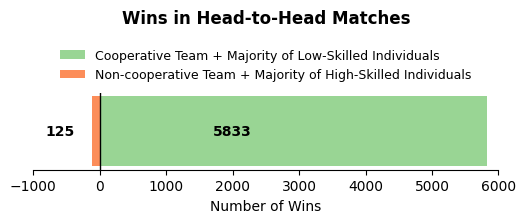

In [55]:
import matplotlib.pyplot as plt

# Data
teams = ['Cooperative Team + Majority of Low-Skilled Individuals', 'Non-cooperative Team + Majority of High-Skilled Individuals']
wins = [win_count, -reverse_win_count]  # negative value for the other to signify the other direction

# Create the plot
fig, ax = plt.subplots(figsize=(6, 1))
bars = ax.barh([0, 0], wins, color=['#99d594', '#fc8d59'], align='center', label=teams, height=0.5)  # Add labels

# Customize x-axis
ax.axvline(0, color='black', linewidth=1)  # Central vertical line

# Remove y-axis labels/ticks
ax.set_yticks([])
ax.set_yticklabels([])

# Add legend (positioned below the plot)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=1, frameon=False, fontsize=9)

# Add custom text at specific x-coordinates
ax.text(-600, 0, str(reverse_win_count), ha='center', va='center', color='black', fontsize=10, fontweight='bold')
ax.text(2000, 0, str(win_count), ha='center', va='center', color='black', fontsize=10, fontweight='bold')

# Add title and x-label
ax.set_xlim(-1000, 6000)
ax.set_xlabel('Number of Wins')
ax.set_title('Wins in Head-to-Head Matches', fontweight='bold', pad=50)

# Remove spines (optional)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()
